<hr style="height:2px;border:none"/>
## INF-383 Seminario de Modelos y Métodos Cuantitativos
### Primer semestre de 2018
#### Nombre: Margarita Bugueño Pérez  
#### Rol: 201373510-k
<hr style="height:3px;border:none"/>

<H3 align='center'> Tarea 2 </H3>
<hr style="height:2px;border:none"/>

##### 1. Sea G un grafo completo no orientado (todos conectados con todos) de 400 nodos. A partir de las 00:00 horas comenzamos a borrarle aristas, escogidas al azar, a razón de 1 por segundo. ¿A qué hora, en promedio, debiera dejar de existir una componente conexa gigante?  

No lo simule: calcúlelo (y explique su cálculo y cualquier supuesto extra que requiera).

In [112]:
from igraph import * 
import numpy as np

gk=Graph.Full(400)
eliminados=0
total=70000
hist_original=gk.degree_distribution()
grado_prom=hist_original.mean
print ("Grado promedio del grafo completo", grado_prom)
print ("Cantidad de arcos del grafo completo K_400:", gk.ecount())

Grado promedio del grafo completo 399.0
Cantidad de arcos del grafo completo K_400: 79800


In [113]:
arreglo=np.linspace(0,total,total,dtype=int)
gk.delete_edges(arreglo)
print ("Eliminaré",total,"arcos a fin de agilizar el proceso")
hist= gk.degree_distribution()
grado_prom=hist.mean
print ("Con ello obtengo grado promedio: ",grado_prom)

Eliminaré 70000 arcos a fin de agilizar el proceso
Con ello obtengo grado promedio:  49.00000000000001


In [114]:
while (grado_prom>=1.0):
    gk.delete_edges(1)
    eliminados+=1
    hist= gk.degree_distribution()
    grado_prom=hist.mean

print ("Grado promedio final ", grado_prom)
print ("Este se obtiene luego de ",eliminados+total,"arcos eliminados")

Grado promedio final  0.9950000000000001
Este se obtiene luego de  79601 arcos eliminados


In [115]:
def det_tiempo(s):
    horas=np.int(s/3600)
    minut=np.int((s-(horas*3600))/60)
    seg=s-((horas*3600)+minut*60)
    return horas,minut,seg
H,M,S=det_tiempo(eliminados+total)
print ("Se requieren",H,"horas, con ",M,"minutos y ",S,"segundos")

Se requieren 22 horas, con  6 minutos y  41 segundos


Siendo p el grado promedio de una red, es sabido que cuando $p<1$, entonces el grafo no cuenta con ninguna componente gigante y las componentes que existen en una red son equivalentes a árboles. Cuando $p=1$, la red contiene grandes componentes y cada una posee ciclos, mientras que cuando $p>1$, el grafo presenta una única componente gigante.   
Así entonces, dado un grafo completo de 400 nodos, se inicia la eliminación de arcos a una velocidad de 1 enlace por segundo.   
Para agilizar este proceso, se eliminan arbitrariamente 70000 arcos, y luego se entra en un ciclo 'while' que sólo se romperá cuando el grado promedio decaiga por debajo de 1.0. Con esto, se obtiene que son necesarios 79601 segundos, es decir, 22 horas con 6 minutos y 41 segundos desde que se dió inicio al proceso (a las 00:00AM).  
En otras palabras, a las 22:06:41 ya no existirá componente gigante en nuestra red de 400 nodos.

##### 2. Sea G el grafo con matriz de adyacencia: 
    
0 1 1 0 0 0   
1 0 1 0 0 0  
1 1 0 1 0 0  
0 0 1 0 1 1  
0 0 0 1 0 1  
0 0 0 1 1 0  


##### Escriba la matriz laplaciana y determine el valor de Fiedler, junto al vector propio asociado. Grafique la red incluyendo los valores del vector propio, y úselo para determinar la (bastante evidente) partición de la red en dos comunidades.

En la siguiente celda se crea el grafo correspondiente a la matriz de adyacencia dispuesta. Así entonces, se presenta la lista de adyacencia equivalente. 

In [116]:
from igraph import *
import numpy as np
import pandas as pd

matriz = [[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
a = pd.DataFrame(matriz)
A= a.values
print ("\nMatriz de adyacencia\n", A)
g = Graph(directed=False)
g = g.Adjacency(A.astype(bool).tolist())
print ("\nLista de adyacencia", g)



Matriz de adyacencia
 [[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 1 1 0]]

Lista de adyacencia IGRAPH D--- 6 14 --
+ edges:
0->1 0->2 1->0 1->2 2->0 2->1 2->3 3->2 3->4 3->5 4->3 4->5 5->3 5->4


Igualmente, se obtienen los grados de cada uno de los vértices que componen al grafo creado.  
Se aprecia que 'grados' informa la suma de tanto los arcos que ingresan al nodo en cuestión como aquellos arcos que salen del mismo. Es decir, corresponde a la suma de 'gradosin' y 'gradosout'.  
Mediante la librería iGraph, se obtiene la matriz Laplaciana del grafo 'g', la cual se compara con la obtenida mediante cálculo (matriz diagonal de grados, D, menos la matriz de Adyacencia, A) notando que son equivalentes.

In [117]:
grados = g.degree()
print ("\nGrados del grafo", grados)
gradosin = g.degree(type='in')
print ("\nGrados in del grafo", gradosin)
gradosout = g.degree(type='out')
print ("\nGrados out del grafo", gradosout)
L = g.laplacian()
print ("\nMatriz laplaciana del grafo obtenida con iGraph: \n", np.asmatrix(L))
D=np.zeros((6,6))
for i in range(len(D)):
    D[i][i]=g.degree(i, type='in')
print ("\nMatriz laplaciana obtenida mediante cálculo: \n", D-A)


Grados del grafo [4, 4, 6, 6, 4, 4]

Grados in del grafo [2, 2, 3, 3, 2, 2]

Grados out del grafo [2, 2, 3, 3, 2, 2]

Matriz laplaciana del grafo obtenida con iGraph: 
 [[ 2 -1 -1  0  0  0]
 [-1  2 -1  0  0  0]
 [-1 -1  3 -1  0  0]
 [ 0  0 -1  3 -1 -1]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0 -1 -1  2]]

Matriz laplaciana obtenida mediante cálculo: 
 [[ 2. -1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1. -1.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1. -1.  2.]]


/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: type=... keyword argument is deprecated since igraph 0.6, use mode=... instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: type=... keyword argument is deprecated since igraph 0.6, use mode=... instead
  """
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: type=... keyword argument is deprecated since igraph 0.6, use mode=... instead
  # This is added back by InteractiveShellApp.init_path()


Con esto, sólo resta obtener los vectores propios (y los correspondientes valores propios) de la matriz Laplaciana 'L' mediante las funciones predispuestas por Numpy.   
Con ello, se obtiene: 
  
Valor de Fiedler (segundo valor propio más pequeño):  
0.438  

Vector de Fiedler (con cada componente asociada a cada nodo):   
[-0.46470513, -0.46470513, -0.26095647, 0.26095647, 0.46470513, 0.46470513]

In [118]:
lambdas,w = np.linalg.eig(L)
print ("\nValores propios \n",lambdas)
print ("\nVectores propios \n",w)

#lambda2: el segundo eigenvalor más pequeño no nulo de la matriz laplaciana 
val2 = sorted(lambdas)[1] #posicion 1 corresponde al segundo valor más pequeño
print ("\nValor de Fiedler\n", val2) 
w2 = w[:, np.where(lambdas ==val2)]
print ("\nVector propio asociado\n", w2)


Valores propios 
 [4.56155281e+00 3.00000000e+00 1.51300012e-16 4.38447187e-01
 3.00000000e+00 3.00000000e+00]

Vectores propios 
 [[ 0.18452409 -0.76376262 -0.40824829 -0.46470513 -0.04778662  0.03549245]
 [ 0.18452409  0.54554473 -0.40824829 -0.46470513  0.50049386 -0.42291195]
 [-0.6571923   0.21821789 -0.40824829 -0.26095647 -0.45270724  0.3874195 ]
 [ 0.6571923   0.21821789 -0.40824829  0.26095647 -0.45270724  0.3874195 ]
 [-0.18452409 -0.10910895 -0.40824829  0.46470513 -0.11632899 -0.66522385]
 [-0.18452409 -0.10910895 -0.40824829  0.46470513  0.56903622  0.27780436]]

Valor de Fiedler
 0.4384471871911695

Vector propio asociado
 [[[-0.46470513]]

 [[-0.46470513]]

 [[-0.26095647]]

 [[ 0.26095647]]

 [[ 0.46470513]]

 [[ 0.46470513]]]


La siguiente celda muestra la configuración de etiquetas de cada nodo a fin de que éstos datos se desplieguen en el gráfico de la red. Sin embargo, se encontraron inconvenientes a la hora de imprimir la red en el actual entorno Jupyter por lo que se decidió hacer mediante la consola de python al ejecutar 'pregunta2.py'
En otras palabras, para realizar el gráfico solicitado se ejecutó en Terminal la línea: python pregunta2.py


In [119]:
new_labels = []
for i in range(6):
    new_label = "\n\n\n\n G:"+str(gradosin[i])+"\nVal prop:"+str(np.round(w2[i],3))
    new_labels.append(new_label)

g.vs["label"] = new_labels

In [9]:
'''
visual_style = {}
visual_style["bbox"] = (900, 600)
visual_style["margin"] = 100
visual_style["edge_width"] = 1

plot(g, **visual_style)
'''
#HECHO EN PYTHON TERMINAL

'\nvisual_style = {}\nvisual_style["bbox"] = (900, 600)\nvisual_style["margin"] = 100\nvisual_style["edge_width"] = 1\n\nplot(g, **visual_style)\n'

Se adjunta una imagen con la red en donde cada nodo tiene asociado su grado y el valor del vector propio de Fiedler correspondiente.  
Resulta evidente la partición de la red en dos comunidades de 3 nodos cada una, donde la comunidad de la izquierda (superior) tiene asociado los valores positivos para las componentes del vector propio mientras que la de la derecha (inferior) tiene asociado aquellos negativos. Además, es importante mecionar que la simetría de la red se refleja tanto en la disposición de ésta como en sus arcos, que resultan ser bidireccionales.

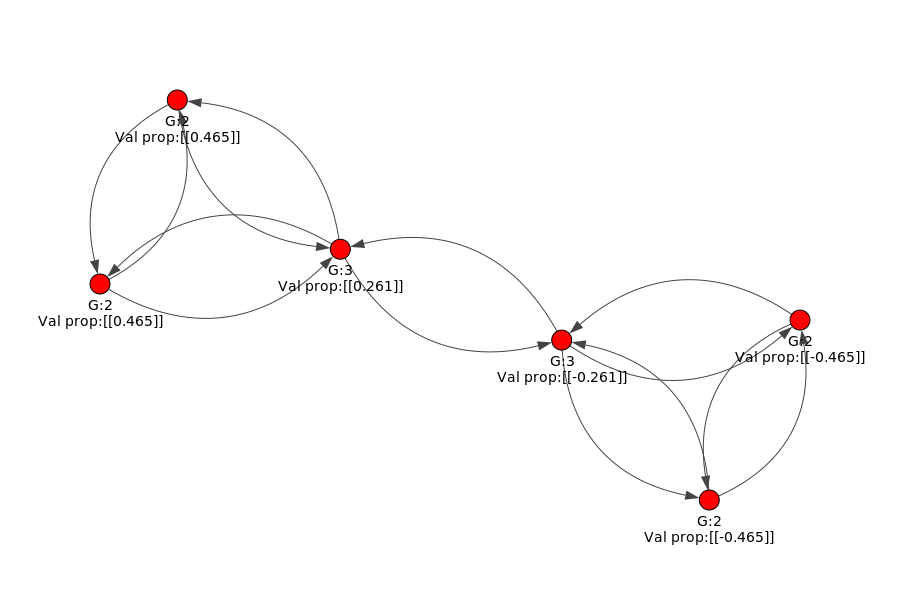

In [121]:
from IPython.display import Image
Image(filename='imagenes/pregunta2.png')

##### 3. Cuál es la diferencia entre una 2-componente y un 2-core? Explique, y construya un ejemplo de red pequeña que tenga un 2-core pero dos 2-componentes.

Dentro de un grafo o red, existe los conceptos de k-componente y k-core, los cuales hacen referencia a configuraciones totalmente distintas. Por un lado una k-componente indica un conjunto de k nodos conectados dentro del grafo, existiendo un camino desde cualquiera de ellos hacia cualquier otro de la componente. Por otro lado un k-core corresponde al conjunto de nodos donde cada uno está conectado a los demás con al menos k aristas (grado k como mínimo).  

Para ejemplificar esto se dispone la siguiente configuracón de grafo: 

In [11]:
g2 = Graph()
g2.add_vertices(12)
g2.add_edges([(0,1),(0,2),(2,1),(3,4),(3,5),(4,5),(6,7),(6,8),(7,8),(9,10),(9,11),(10,11)])
print (g2)

IGRAPH U--- 12 12 --
+ edges:
0--1 0--2 1--2 3--4 3--5 4--5 6--7 6--8 7--8 9--10 9--11 10--11


In [12]:
new_labels = []
for i in range(12):
    new_label = str(i)
    new_labels.append(new_label)
g2.vs["label"] = new_labels

In [120]:
'''
visual_style = {}
visual_style["bbox"] = (900, 600)
visual_style["margin"] = 100
visual_style["edge_width"] = 1

plot(g2, **visual_style)
'''
#HECHO EN PYTHON TERMINAL

'\nvisual_style = {}\nvisual_style["bbox"] = (900, 600)\nvisual_style["margin"] = 100\nvisual_style["edge_width"] = 1\n\nplot(g2, **visual_style)\n'

Nuevamente, por los mismos inconvenientes, se presenta la imágen del grafo construído mediante python (programa3.py) en la siguiente celda: 

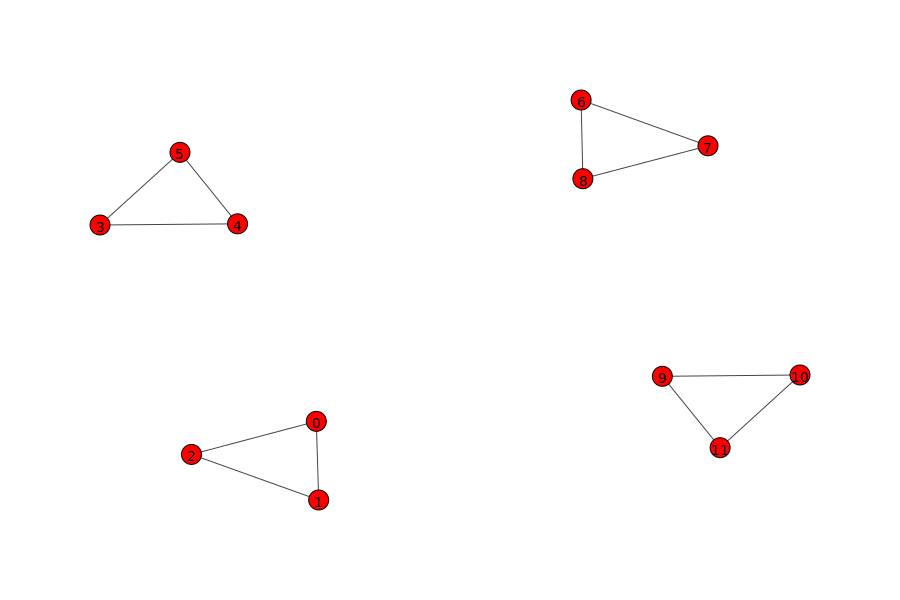

In [14]:
Image(filename='imagenes/pregunta3.png')

Así se diferencia claramente una red que tiene dos 2-componentes (una superior y otra inferior, ambas de 2 componentes compuestas por 3 nodos), un 2-core dado que la red completa posee nodos de grado mayor o igual a 2. Ahora bien, si se estudia cada una de las 4 subgrafos (triángulos), podemos igualmente afirmar que se tratan de un 2-core. 
Así entonces, se puede notar que se trata de dos conceptos totalmente diferentes. Uno sobre la cantidad de componentes (subredes conectadas) y otro sobre el grado mínimo de los nodos de un grafo (o subgrafo).

#### 4. Baje la red redchica.gdf . 

> ###### (a) Grafíquela, indicando junto a cada nodo su grado de entrada, su betweenness, y su valor de PageRank.


Para esta pregunta, se utiliza el grafo dirigido ”redchica.gdf”, el cual se muestra a continuacion:

In [123]:
red_chica = Graph.Read_GML("preguntas.py/Datos/redchica.gml")
grados = red_chica.degree(mode="IN")
betweenness = red_chica.edge_betweenness(directed=True)
page_rank = red_chica.pagerank()
red_chica.vs["grados"] = grados
red_chica.vs["betweenness"] = betweenness
red_chica.vs["page_rank"] = page_rank

In [124]:
labels = red_chica.vs["label"]
new_labels = []
for i in range(len(labels)):
    new_label = "\n\n\n\n\n"+labels[i]+": G:"+str(grados[i])+"\nB:"+str(betweenness[i])+"\nP:"+str(page_rank[i])
    new_labels.append(new_label)
red_chica.vs["label"] = new_labels

In [17]:
'''
visual_style = {}
visual_style["bbox"] = (900, 600)
visual_style["margin"] = 70
visual_style["edge_width"] = 1

plot(red_chica, **visual_style)
'''
#HECHO EN PYTHON TERMINAL

'\nvisual_style = {}\nvisual_style["bbox"] = (900, 600)\nvisual_style["margin"] = 70\nvisual_style["edge_width"] = 1\n\nplot(red_chica, **visual_style)\n'

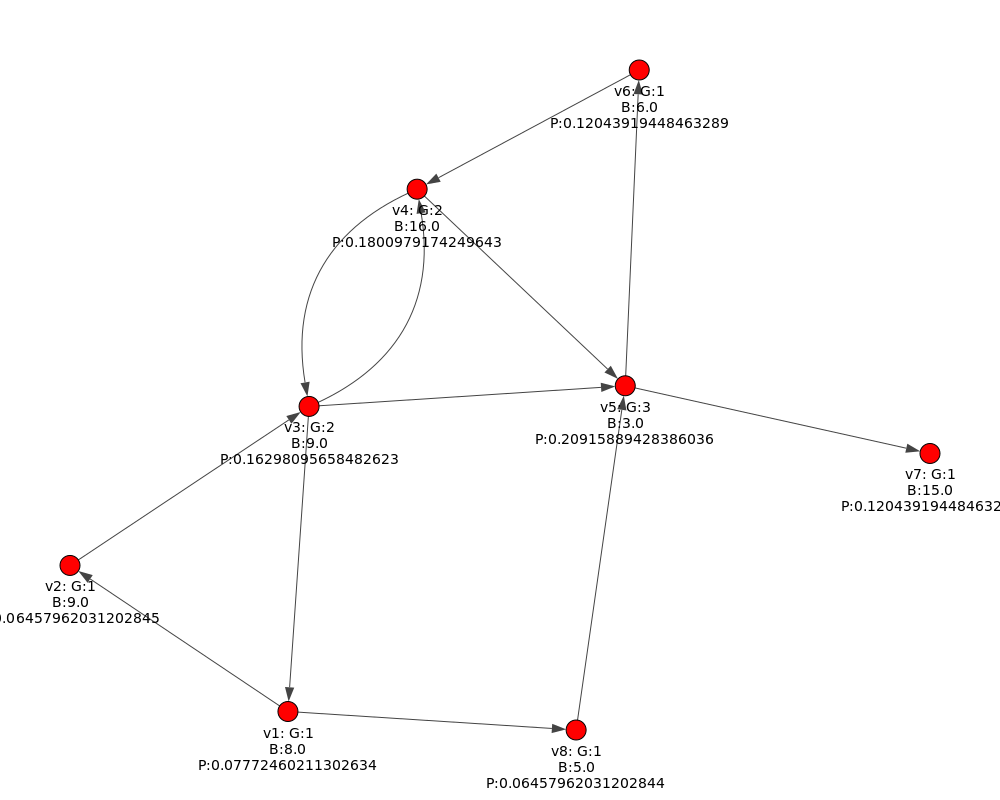

In [125]:
Image(filename='imagenes/pregunta4a.png')

Como se puede observar en la imagen, la red está compuesta por 8 nodos los cuales informan tanto su etiqueta Vi, su grado de entrada G, su betweenness B y su PageRank P, tal como se solicitó en un inicio.  

> ###### (b) Haga un ranking de los nodos en función de cada uno de esos tres índices.


A continuación, se rankean las métricas antes obtenidas a fin de concluir información de valor sobre la red.

In [126]:
import operator
def separar(lista):
    l1 = []
    l2 = []
    for elem in lista:
        x,y = elem
        l1.append(x)
        l2.append(y)
    return l1,l2

grados_aux = {}
betweenness_aux = {}
page_rank_aux = {}
for i in range(len(labels)):
    vertice = labels[i]
    grados_aux[vertice] = grados[i]
    betweenness_aux[vertice] = betweenness[i]
    page_rank_aux[vertice] = page_rank[i]
grados_aux = sorted(grados_aux.items(), key=operator.itemgetter(1),reverse=True)
betweenness_aux = sorted(betweenness_aux.items(), key=operator.itemgetter(1),reverse=True)
page_rank_aux = sorted(page_rank_aux.items(), key=operator.itemgetter(1),reverse=True)
grados_l1, grados_l2 = separar(grados_aux)
betweenness_l1, betweenness_l2 = separar(betweenness_aux)
page_rank_l1, page_rank_l2 = separar(page_rank_aux)

a = [grados_l1,grados_l2,betweenness_l1,betweenness_l2,page_rank_l1,page_rank_l2]
print ("Grados")
print(np.vstack((a[0],a[1])).T)
print ("\nBetweenness")
print(np.vstack((a[2],a[3])).T)
print ("\nPage Rank")
print(np.vstack((a[4],a[5])).T)

Grados
[['v5' '3']
 ['v3' '2']
 ['v4' '2']
 ['v1' '1']
 ['v2' '1']
 ['v6' '1']
 ['v7' '1']
 ['v8' '1']]

Betweenness
[['v4' '16.0']
 ['v7' '15.0']
 ['v2' '9.0']
 ['v3' '9.0']
 ['v1' '8.0']
 ['v6' '6.0']
 ['v8' '5.0']
 ['v5' '3.0']]

Page Rank
[['v5' '0.20915889428386036']
 ['v4' '0.1800979174249643']
 ['v3' '0.16298095658482623']
 ['v6' '0.12043919448463289']
 ['v7' '0.12043919448463289']
 ['v1' '0.07772460211302634']
 ['v2' '0.06457962031202845']
 ['v8' '0.06457962031202844']]


> ###### (c) Comente sobre las posibles correlaciones entre esos valores, y sus divergencias.   
##### P. ej., ¿hay nodos con mejor PageRank que el esperable por su grado de entrada? ¿O con peor PageRank? ¿Y qué hay de su betweenness? Interprete, a la luz de la red, el por qué de esas discrepancias.

Al analizar los rankings, es posible notar ciertas correlaciones así como ciertas divergencias. Un ejemplo de divergencia lo es el nodo V5 que posee el mayor grado (3) y el mayor Pagerank (0.21 app), lo que hace intuir que se trata de un nodo por el cual cruzan varios caminos en la red a fin de llegar desde un nodo a otro, lo mismo con su valor de PageRank, siendo parte de un grupo bien cohesivo. Sin embargo, puesto su valor de Betweenness es el más bajo (3), por lo que al tomar dos nodos aleatorios, V5 rara vez actúa como puente en el camino más corto entre ambos. Esto resulta intuitivo al momento de analizar visualmente la red.  
El nodo V5, posee sólo 2 arcos de salida, los cuales tienen como destino a nodos 'aislados' en la red (especialmente V7), por lo que rara vez se podrá seguir recorriendo la red.  

Otra divergencia corresponde al nodo V7, este posee el grado más bajo (junto con V8), así como Pagerank bajo (0.12). Sin embargo, corresponde al nodo con el segundo valor más alto de Betweenness (15), es decir, frecuentemente el nodo V7 sirve como puente a lo largo del camino más corto entre dos nodos cualesquiera. Esto resulta poco intuitivo dado que V7 no posee arcos de salida, impedimento para intermediar entre 2 nodos a menos que éste sea el nodo destino (tal como la propia estructura indica). 

Respecto a los demás vértices, parecen obtenerse métricas esperadas. 

##### 5. Para esta pregunta consideraremos cuatro redes: las de los archivos gnutella.gdf  y  delfínes.gml, y además un par de redes Erdös-Renyi que usted debe generar con la misma cantidad de nodos y la misma densidad de aristas. Ambas son redes no orientadas; la primera es un fragmento de la red p2p Gnutella, mientras que la segunda corresponde a la red de interacciones sociales de una comunidad de delfines en Nueva Zelandia.  
##### Ataque a piratas y delfines de las siguientes tres maneras:
    
**• Eliminando nodos al azar  
• Eliminando nodos en orden de grado decreciente   
• Eliminando nodos en orden de betweenness decreciente  **

**De ser posible, recalcule grados y betweenness en la medida que vaya eliminando nodos (salvo si la eliminación por betweenness se le vuelve demasiado lenta en Gnutella). Para cada red y para cada modo de ataque, determine el porcentaje de nodos que hace falta eliminar para que la componente gigante caiga a 1/2 de su tamaño inicial. Comente sus resultados**

El propósito de esta actividad es realizar diferentes ataques a estas redes (atacando nodos al azar, atacando nodos en orden de grado decreciente o atacando nodos según betweenness decrecientemente). Así, se determina el porcentaje de nodos que hace falta eliminar tal que la componente gigante de la red en cuestión caiga a la mitad del tamaño original.

In [127]:
import operator
import copy

visual_style = {}
visual_style["bbox"] = (1000, 800)
visual_style["margin"] = 70
visual_style["edge_width"] = 1

def eliminar(grafo,ataque):
    #grafo=grafo.copy()
    num_eliminaciones = 0
    componente_gig = grafo.components().giant()
    n = grafo.vcount()
    n_aux = n
    if(ataque == "random"):
        while( float(componente_gig.vcount())/float(n) > 0.5 ):
            random_num = np.random.randint(0,n_aux-1)
            grafo.delete_vertices(random_num)
            componente_gig = grafo.components().giant()
            num_eliminaciones += 1
            n_aux -=1
    elif(ataque == "grado_decreciente"):
        grados = grafo.degree()
        grados_aux = {}
        labels = grafo.vs["label"]
        for i in range(len(labels)):
            vertice = labels[i]
            grados_aux[vertice] = grados[i]
        sorted_degree = sorted(grados_aux.items(), key=operator.itemgetter(1),reverse=True)
        labels_aux = labels
        while( float(componente_gig.vcount())/float(n) > 0.5 ):
            label = sorted_degree[0][0]
            indice = labels_aux.index(label)
            grafo.delete_vertices(indice)
            componente_gig = grafo.components().giant()
            del(sorted_degree[0])
            labels_aux = grafo.vs["label"]
            num_eliminaciones += 1
            n_aux -=1
    elif(ataque == "betweenness_decreciente"):
        betweenness = grafo.edge_betweenness()
        #print ("BETW",betweenness)
        betweenness_aux = {}
        labels = grafo.vs["label"]
        #print ("labels", labels)
        for i in range(len(labels)):
            vertice = labels[i]
            betweenness_aux[vertice] = betweenness[i]
        sorted_betweenness = sorted(betweenness_aux.items(), key=operator.itemgetter(1),reverse=True)
        labels_aux = labels
        while( float(componente_gig.vcount())/float(n) > 0.5 ):
            label = sorted_betweenness[0][0]
            indice = labels_aux.index(label)
            grafo.delete_vertices(indice)
            componente_gig = grafo.components().giant()
            del(sorted_betweenness[0])
            labels_aux = grafo.vs["label"]
            num_eliminaciones += 1
            n_aux -=1
    print ("Ataque: "+ ataque.upper())
    print ("Numero de Eliminaciones: ", num_eliminaciones)
    print ("Porcentaje de nodos eliminados: ", int((1-(float(n_aux)/float(n)))*100),"%")
    #plot(grafo, **visual_style) # Descomentar para ver grafo con eliminaciones



In [129]:

nombres = ["Dolphins", "ER Dolphins", "Nutella", "ER Nutella"]
ataques = ["random","grado_decreciente","betweenness_decreciente"]
cont=0
for nombre in nombres:
    print ("\n",nombre)
    if nombre=="Dolphins":
        for ataque in ataques:
            grafo= Graph.Read_GML("preguntas.py/Datos/dolphins_copia.gml")
            print ("\nNum vertices",grafo.vcount())
            if cont==0:
                #plot(grafo, **visual_style)
                n1 = grafo.vcount()
                m1 = grafo.ecount()
            eliminar(grafo,ataque)
            del grafo
            cont+=1
        cont=0
    elif nombre=="ER Dolphins":
        for ataque in ataques:
            grafo= Graph.Erdos_Renyi(n=n1,m=m1)
            print ("\nNum vertices",grafo.vcount())
            #if cont==0:
                #plot(grafo, **visual_style)
            grafo.vs["label"] = range(n1)
            eliminar(grafo,ataque)
            del grafo
            cont+=1
        cont=0
    elif nombre=="Nutella":
        for ataque in ataques:
            grafo= Graph.Read_GML("preguntas.py/Datos/gnutella_copia.gml")
            print ("\nNum vertices",grafo.vcount())
            if cont==0:
                #plot(grafo, **visual_style)
                n2 = grafo.vcount()
                m2 = grafo.ecount()
            '''
            eliminar(grafo,ataque)
            del grafo
            cont+=1
        cont=0
    elif nombre=="ER Nutella":
        for ataque in ataques:
            grafo= Graph.Erdos_Renyi(n=n2,m=m2)
            print ("\nNum vertices",grafo.vcount())
            if cont==0:
                plot(grafo, **visual_style)
            grafo.vs["label"] = range(n2)
            eliminar(grafo,ataque)
            del grafo
            cont+=1
            '''


 Dolphins

Num vertices 62
Ataque: RANDOM
Numero de Eliminaciones:  26
Porcentaje de nodos eliminados:  41 %

Num vertices 62
Ataque: GRADO_DECRECIENTE
Numero de Eliminaciones:  17
Porcentaje de nodos eliminados:  27 %

Num vertices 62
Ataque: BETWEENNESS_DECRECIENTE
Numero de Eliminaciones:  27
Porcentaje de nodos eliminados:  43 %

 ER Dolphins

Num vertices 62
Ataque: RANDOM
Numero de Eliminaciones:  31
Porcentaje de nodos eliminados:  50 %

Num vertices 62
Ataque: GRADO_DECRECIENTE
Numero de Eliminaciones:  22
Porcentaje de nodos eliminados:  35 %

Num vertices 62
Ataque: BETWEENNESS_DECRECIENTE
Numero de Eliminaciones:  28
Porcentaje de nodos eliminados:  45 %

 Nutella

Num vertices 795

Num vertices 795

Num vertices 795

 ER Nutella


A continuació se presentan  las imágenes de cada grafo antes y después de cada uno de los ataques. **Cabe mencionar que las imágenes no corresponden a los resultados reflejados en la celda anterior puesto que éstas se obtuvieron mediante Terminal en ejecuciones previas**:


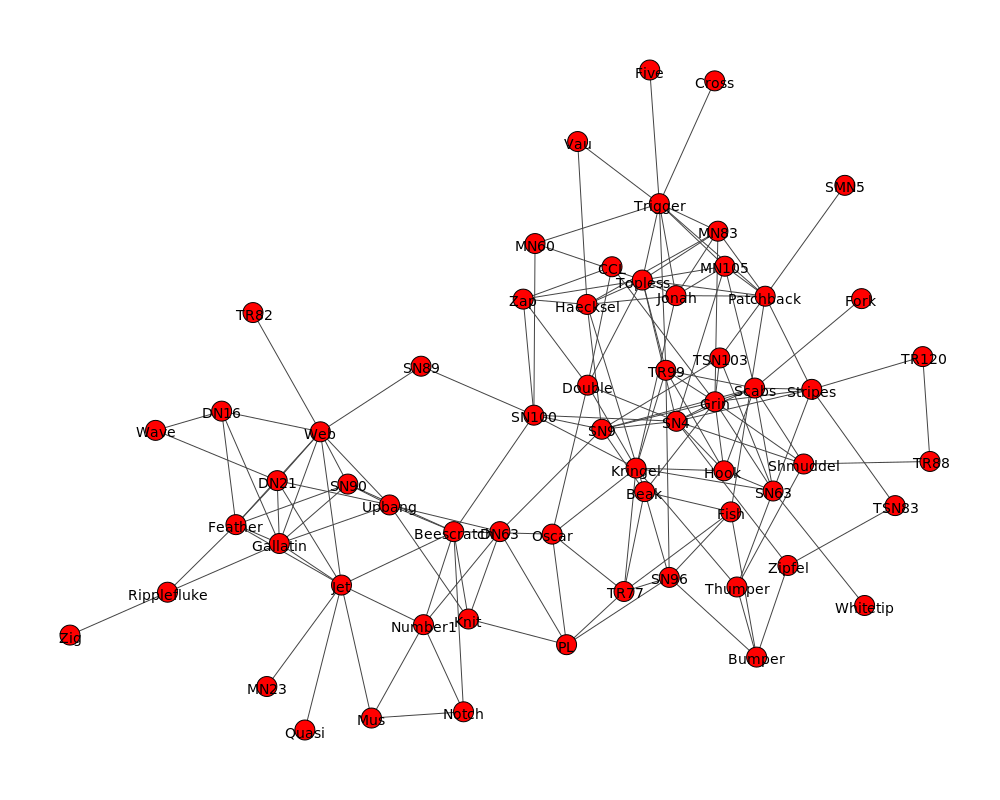

In [130]:
Image(filename='imagenes/redOriginalDolphins.png',width=700, height=600)

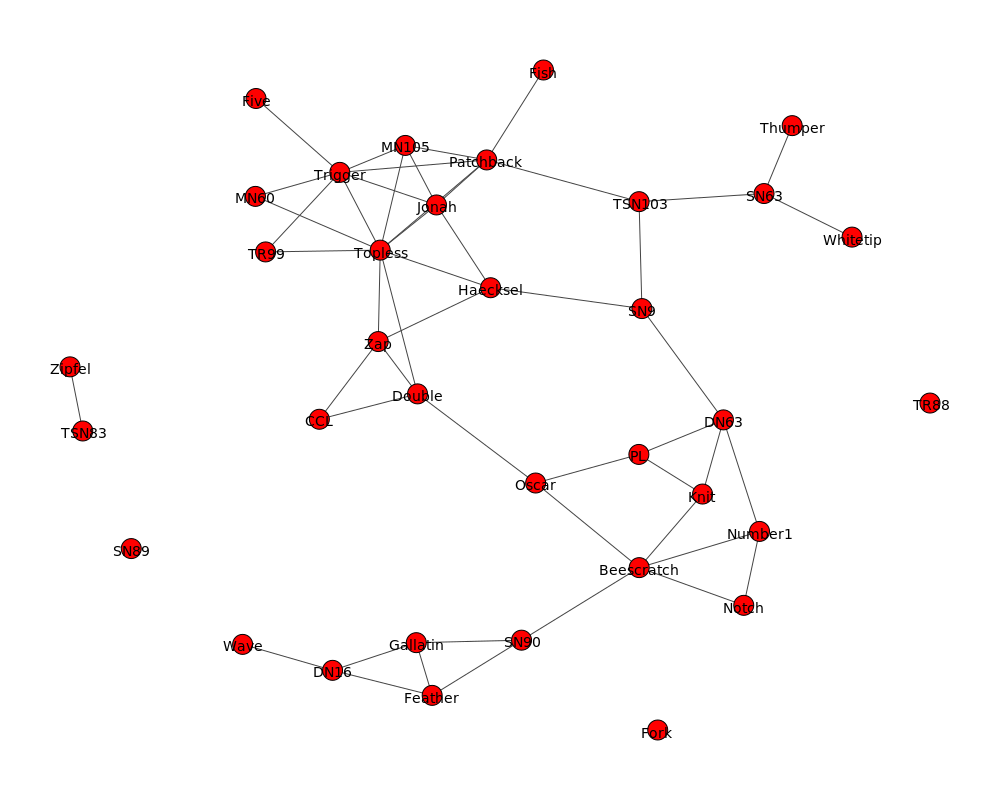

In [45]:
Image(filename='imagenes/random27dolphins.png',width=500, height=500)


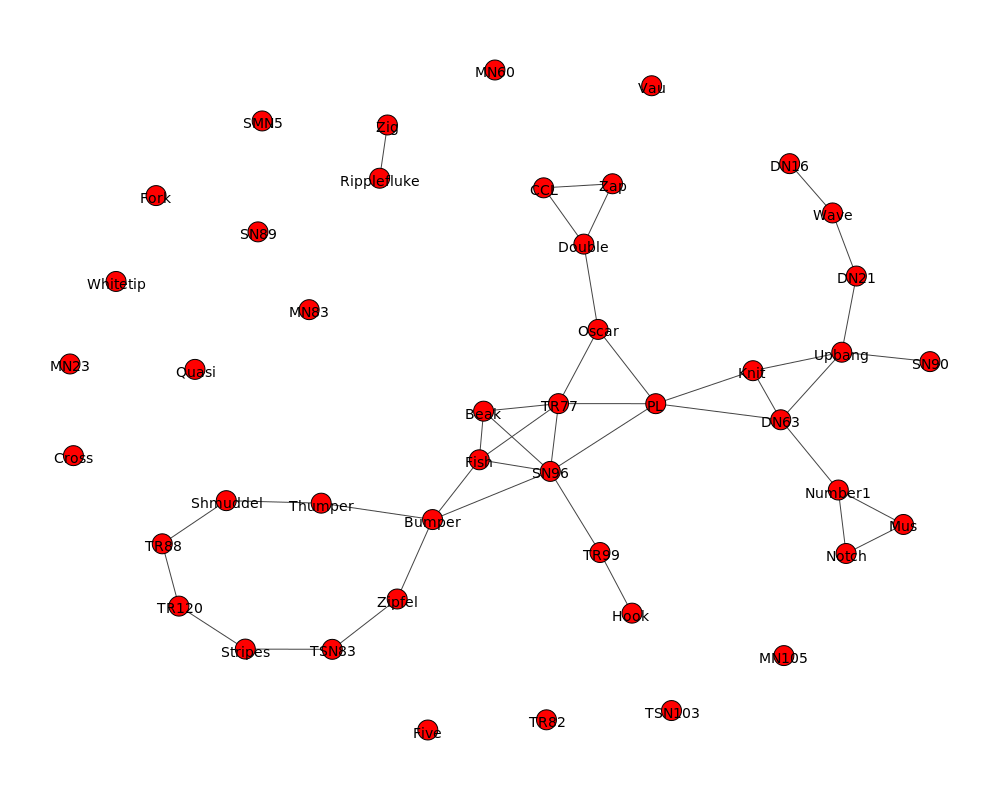

In [44]:
Image(filename='imagenes/grado17dolphins.png',width=500, height=500)

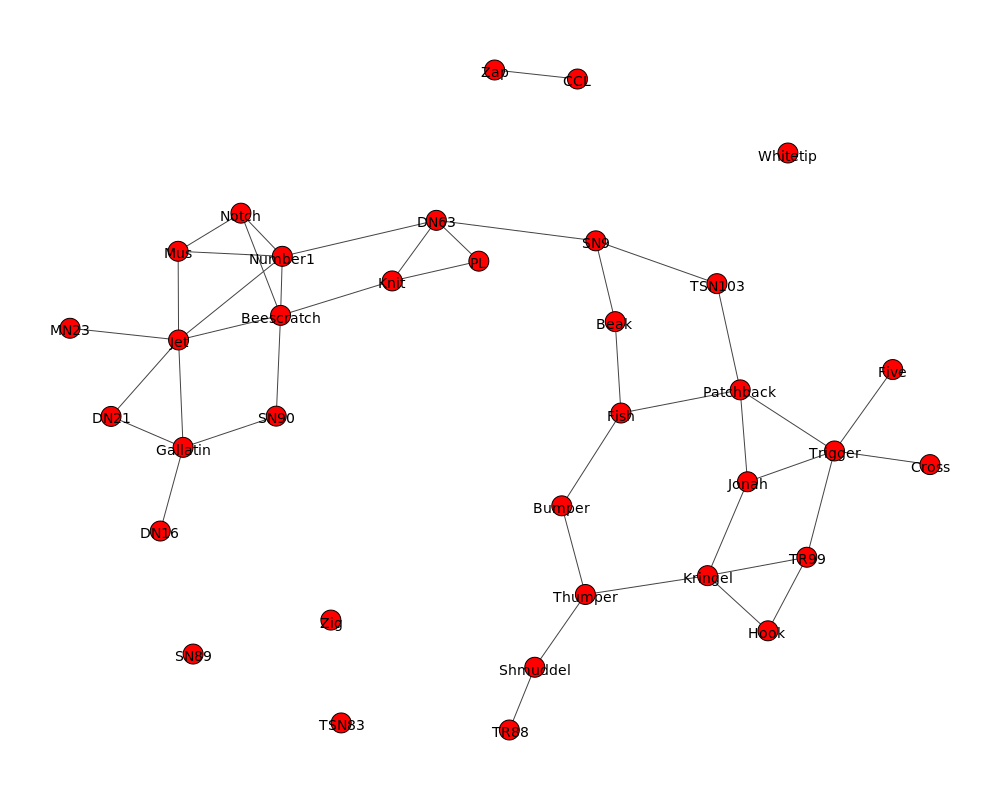

In [41]:
Image(filename='imagenes/betw27dolphins.png',width=500, height=500)

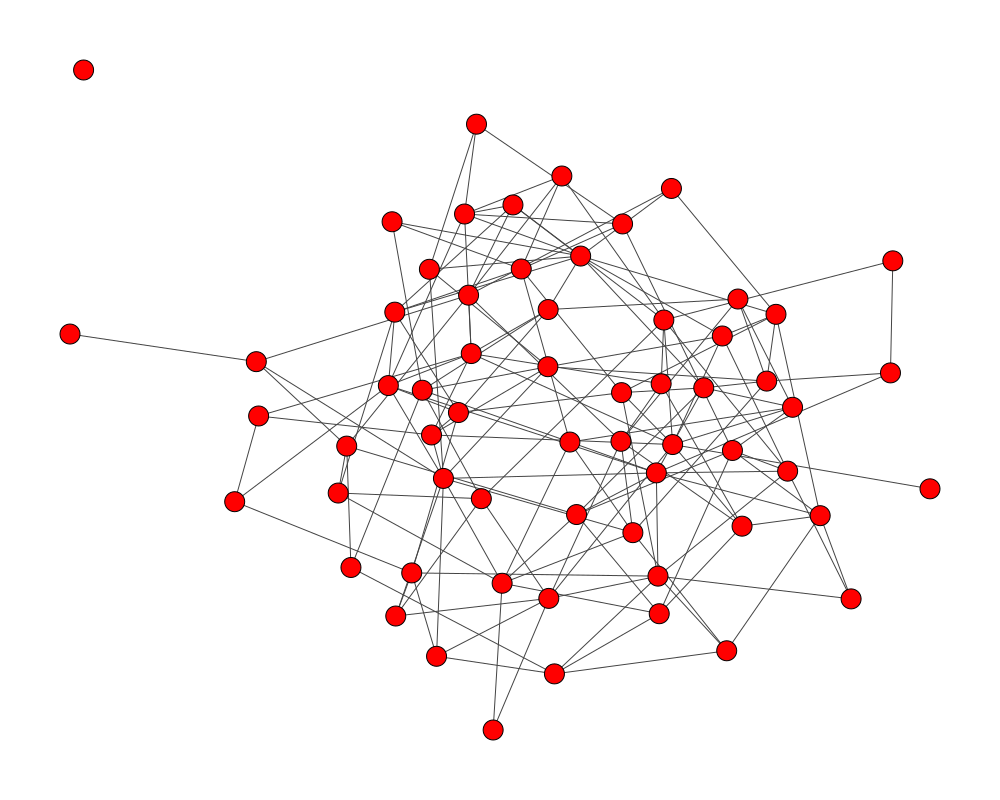

In [63]:
Image(filename='imagenes/ERdolphinsOriginal.png',width=700, height=700)

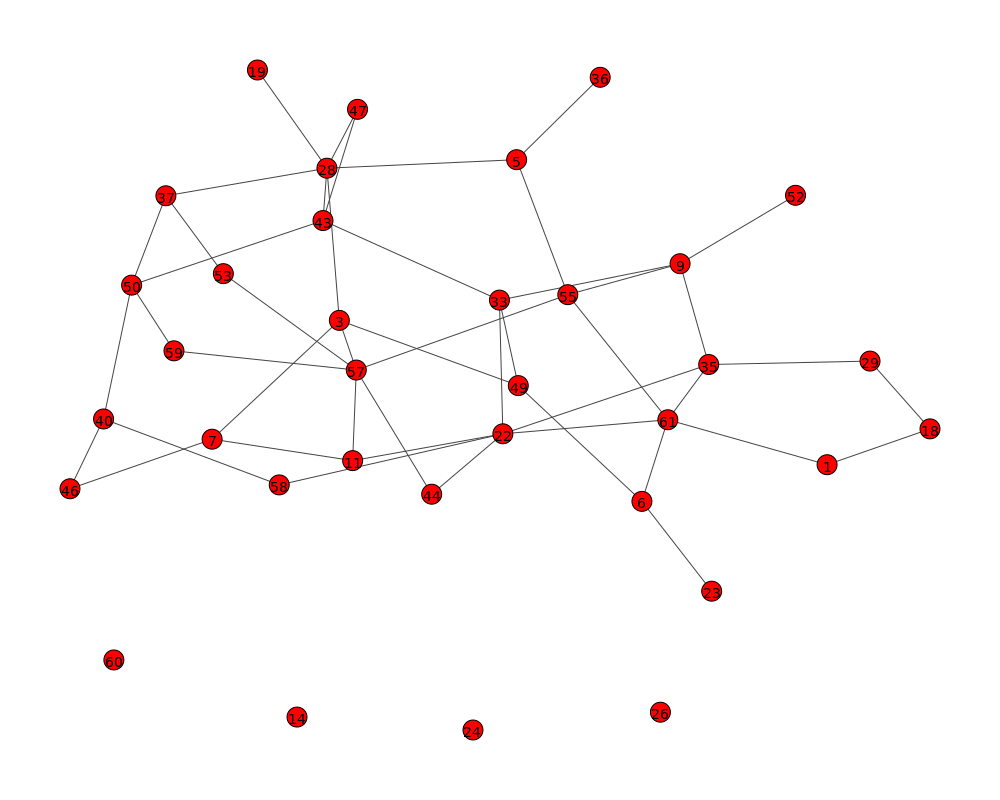

In [64]:
Image(filename='imagenes/random27ERdolphins.png',width=500, height=500)

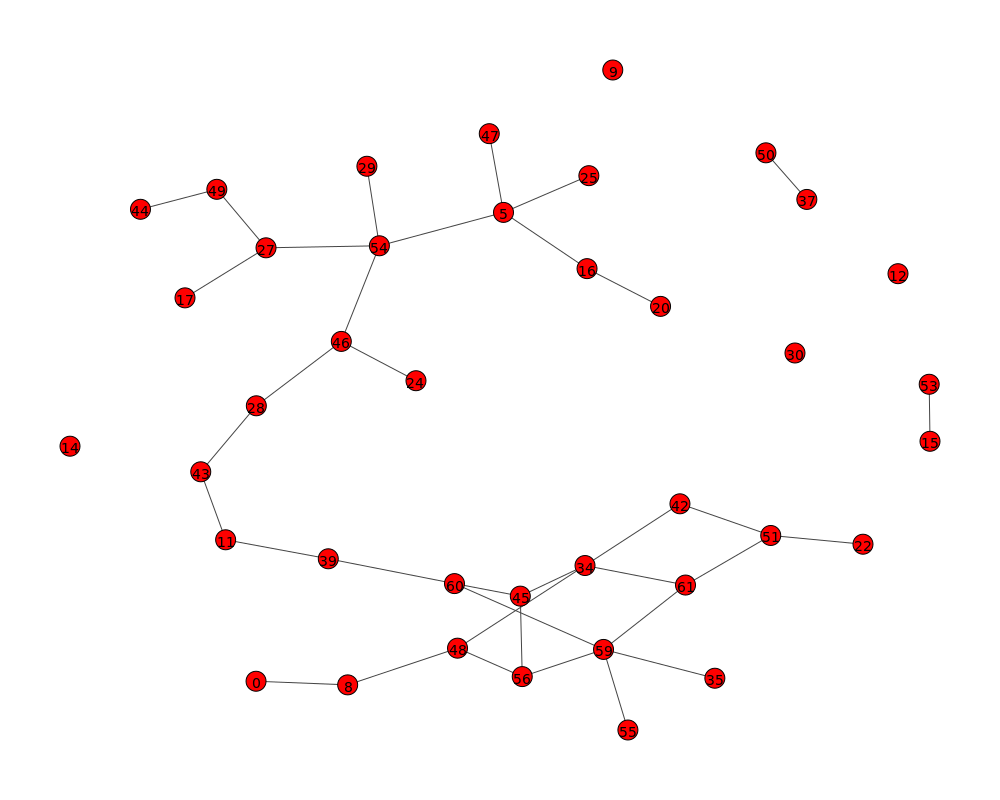

In [43]:
Image(filename='imagenes/grado23ERdolphins.png',width=500, height=500)

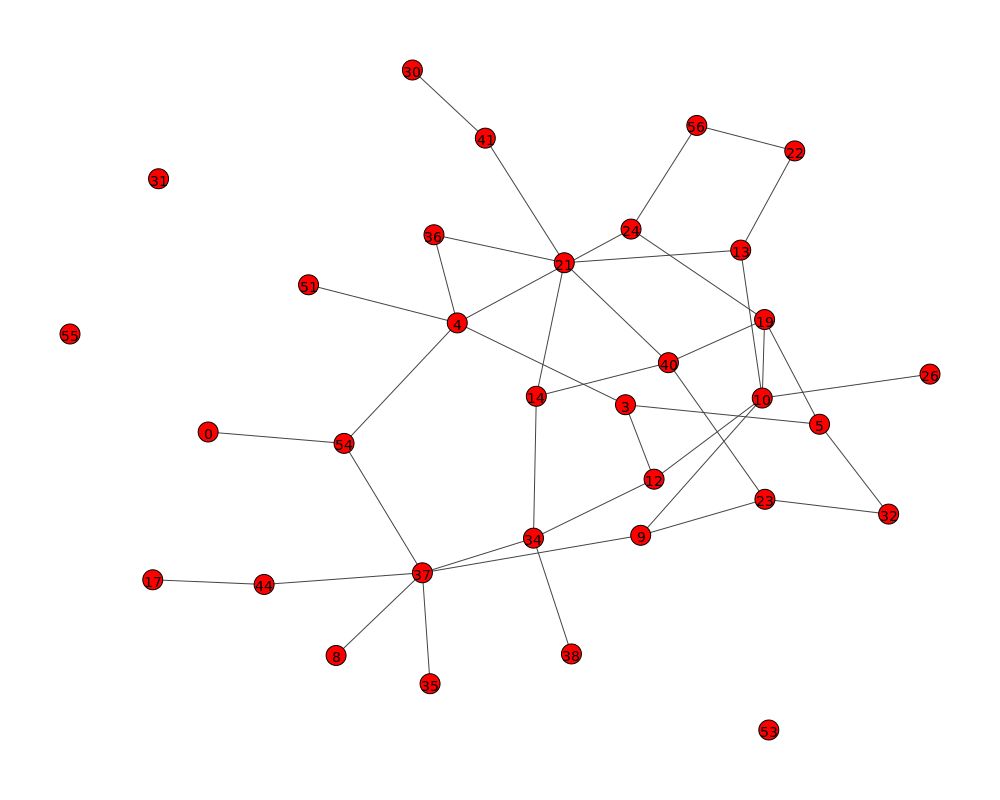

In [39]:
Image(filename='imagenes/betw29ERdolphins.png',width=500, height=500)

Es evidente que cada tipo de ataque produce diferentes redes resultantes (desconexiones), es decir, diferentes tipos de componentes gigantes reducidas a la mitad del tamaño real. Sin embargo, la diferencia más notoria corresponde a la cantidad de eliminaciones necesarias según el ataque realizado.   

Esto se resume en:   

**Red Dolphins**
Num vertices originales: 62   
Ataque: RANDOM    
Numero de Eliminaciones:  27    
Porcentaje de nodos eliminados:  43 %    

Ataque: GRADO_DECRECIENTE    
Numero de Eliminaciones:  17    
Porcentaje de nodos eliminados:  27 %    

Ataque: BETWEENNESS_DECRECIENTE    
Numero de Eliminaciones:  27   
Porcentaje de nodos eliminados:  43 %    

**Red Erdos Renyi Dolphins**    
Num vertices original: 62    
Ataque: RANDOM    
Numero de Eliminaciones:  27    
Porcentaje de nodos eliminados:  43 %    

Ataque: GRADO_DECRECIENTE   
Numero de Eliminaciones:  23   
Porcentaje de nodos eliminados:  37 %    

Ataque: BETWEENNESS_DECRECIENTE   
Numero de Eliminaciones:  29    
Porcentaje de nodos eliminados:  46 %    

 

Así entonces, se puede observar que tanto para la red Dolphins y ERDolphins, los ataques Random y Betweenness
decreciente realizan una cantidad de eliminaciones prácticamente idéntica (con ello, el porcentaje de eliminación es igualmente equivalente).  
En otras palabras, un ataque guiado por Betweenness no produce ninguna mejora (o deterioro) al ataque arbitrario, no así el ataque en base a grado decreciente; En este caso, este ataque se tradujo en el menor número de eliminaciones. Lo que se indica que un ataque guiado hacia los nodos con mayor grado, tiene mayor impacto de desconexión en la red dañando fuertemente a la componente gigante. 


Lamentablemente, para el grafo de Nutella, la gran cantidad de conexiones y los recursos de memoria que iGraph requería, impidieron el análisis al no lograr concretar la experimentación.  
**Si se desea corroborar lo enunciado, por favor, ejecute pregunta5.py desde el directorio 'preguntas.py'**  
La imagen de la red Nutella se expone a continuación: 

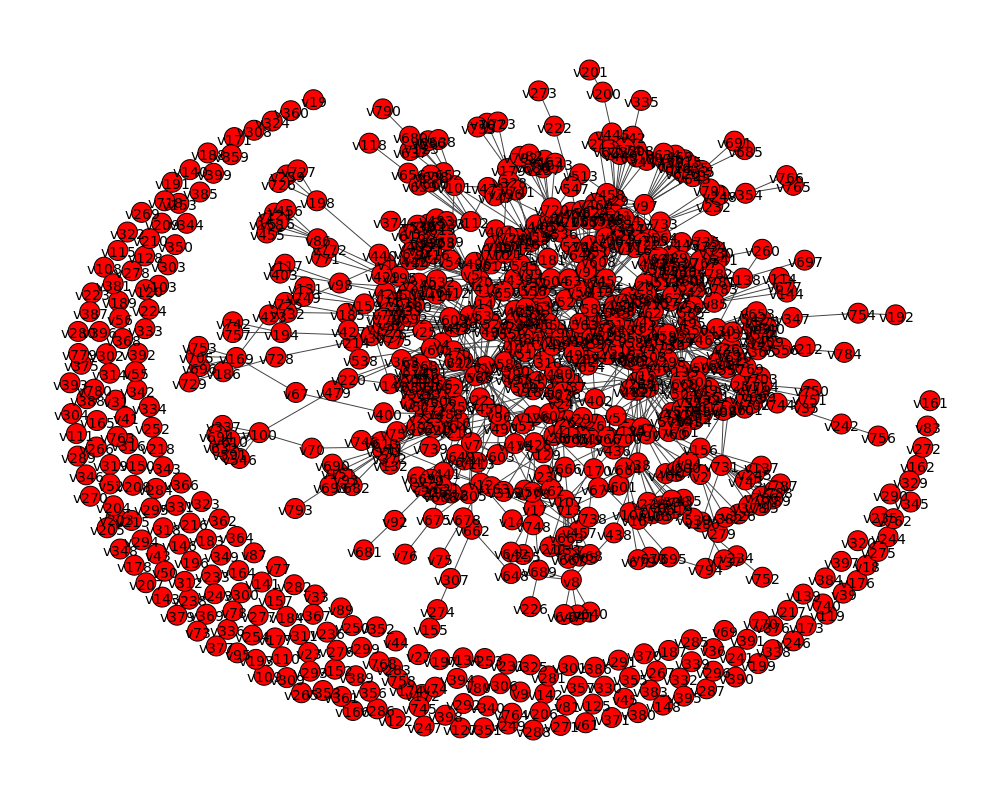

In [62]:
Image(filename='imagenes/redOriginaNutella.png',width=700, height=600)

##### 6. En esta pregunta trabajará con cuatro redes: la que estudió en la tarea 1, una Erdös- Renyi y una Barabási-Albert que mantengan (aprox.) la cantidad de nodos y la densidad, y una versión aleatorizada de su red (obtenida aleatorizando conexiones, de modo  que sólo se preserve la distribución de grados; si su red tiene m aristas, conviene hacer al menos 2m rewires). Si su red era dirigida, pásela a no dirigida (ignore la orientación).

Para esta pregunta se trabaja con la red estudiada en la tarea 1, Protein, la cual corresponde a la red de proteínas que actúan en una molécula de Levadura y que contiene 1870 nodos y 2277 aristas no dirigidas. Además de ésta, se generan 3 nuevas redes: una Erdos-Renyi, una Barabasi-Albert y una versión aleatorizada de Protein. 

In [131]:
g_t1=Graph.Read_Ncol("preguntas.py/Datos/tarea1/protein_prepro.txt",directed=False)
print ("Total de nodos:",g_t1.vcount())
print ("Total de enlaces:",g_t1.ecount())
density = g_t1.density()

Total de nodos: 1870
Total de enlaces: 2277


In [132]:
'''
visual_style = {}
visual_style["bbox"] = (900, 600)
visual_style["margin"] = 20
visual_style["edge_width"] = 2

plot(grafo_tarea1, **visual_style)
'''
#HECHO EN PYTHON TERMINAL

'\nvisual_style = {}\nvisual_style["bbox"] = (900, 600)\nvisual_style["margin"] = 20\nvisual_style["edge_width"] = 2\n\nplot(grafo_tarea1, **visual_style)\n'

In [139]:
g_ER = Graph().Erdos_Renyi(n=g_t1.vcount(), p=density )
#plot(grafo_ER, **visual_style)
g_BA = Graph().Barabasi(n=g_t1.vcount())
#plot(grafo_BA, **visual_style)
#aleatorizar
g_t1_alea = g_t1.copy()
g_t1_alea.rewire(n=2*g_t1.ecount())
#g_t1_alea.write_graphml("g_t1_aleatorizado")
#plot(g_t1_alea, **visual_style)

print ("Densidad grafo Protein (Tarea 1):", density)
print ("Densidad grafo con E-R:",g_ER.density())
print ("Densidad grafo con B-A:",g_BA.density())
print ("Densidad grafo Protein (Tarea 1) aleatorizado:",g_t1_alea.density() )

Densidad grafo Protein (Tarea 1): 0.0013029931073553016
Densidad grafo con E-R: 0.0013012763838937005
Densidad grafo con B-A: 0.0010695187165775401
Densidad grafo Protein (Tarea 1) aleatorizado: 0.001260647261969139


A continuación se presentan las redes con las cuales se trabajará en esta pregunta.

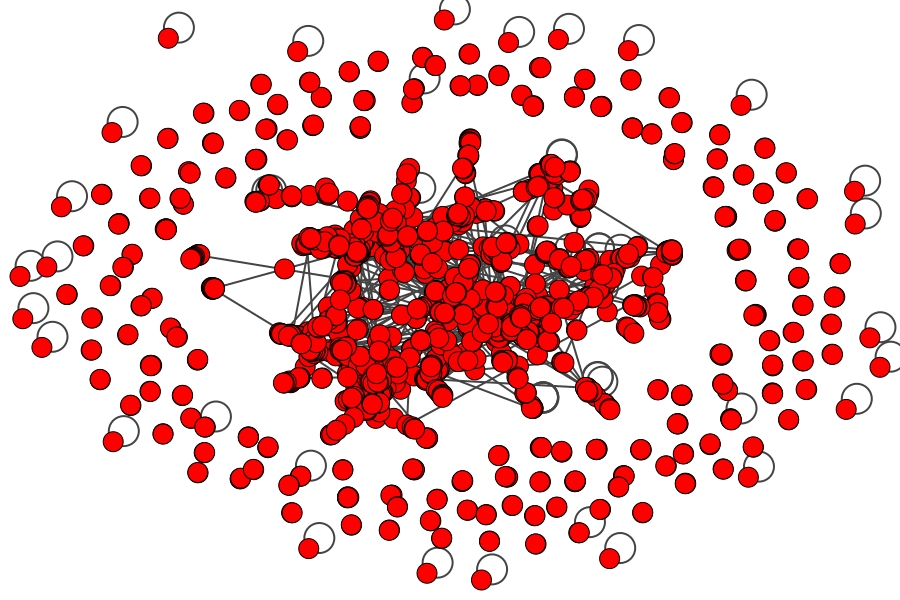

In [104]:
Image(filename='imagenes/Protein.png',width=600, height=500)

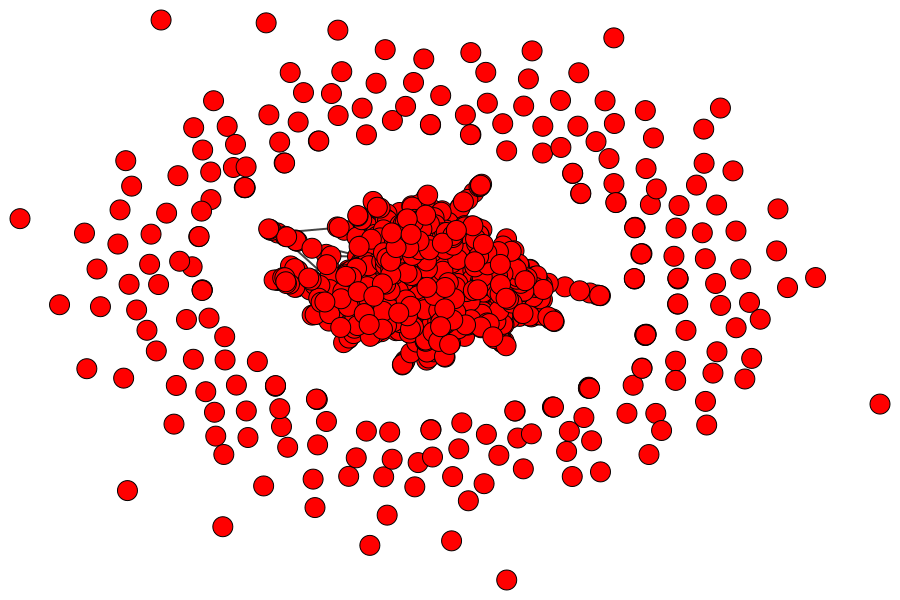

In [105]:
Image(filename='imagenes/ER_pregunta6.png',width=600, height=500)

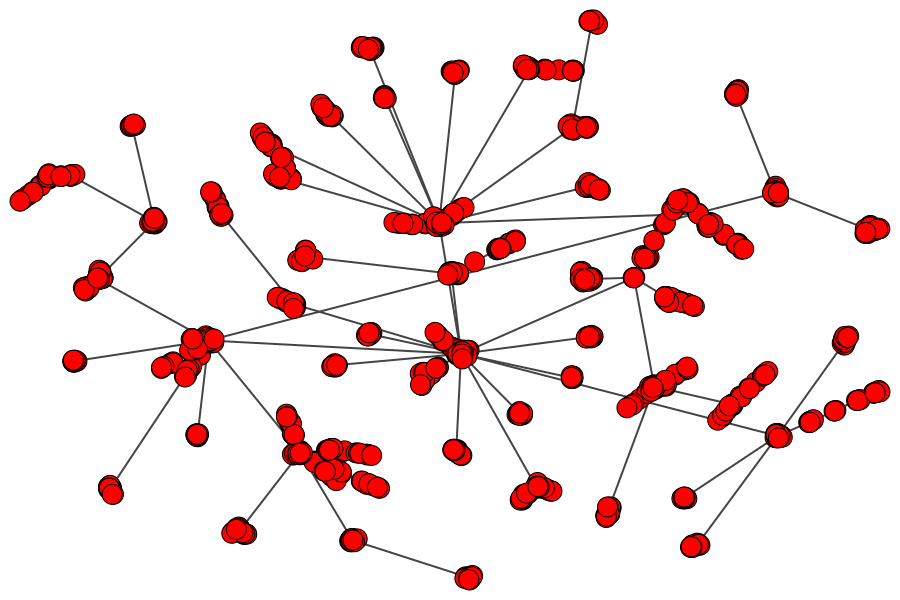

In [106]:
Image(filename='imagenes/BA_pregunta6.png',width=600, height=500)

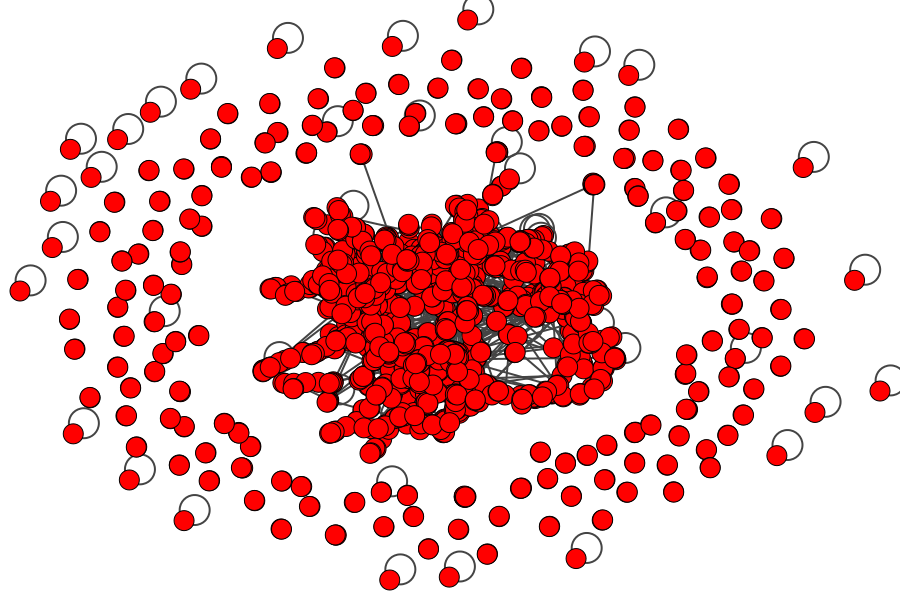

In [107]:
Image(filename='imagenes/Protein_Aleatorizado.png',width=600, height=500)

Cabe destacar que, como se aprecia en las imágenes, las redes g_t1 y g_t1_alea contienen loops, es decir, arcos que salen desde un nodo N y que llegan a él mismo. Mientras que g_ER y g_BA corresponden a grafos que no presentan estas características (grafos simples).

> ##### a. Determine la estructura de k-cores de la red que estudió en la tarea 1, indicando los tamaños de cada capa obtenida. Hágalo también para las otras tres redes. Comente sobre las similitudes y diferencias.


Las estructuras k-core de las 4 redes, se obtienen en base a: 

In [140]:
def cores(grafo):
    lista = grafo.coreness()
    return {i:lista.count(i) for i in set(lista)}

print ("cores grafo Protein (Tarea 1): ",cores(g_t1))
print ("cores grafo E-R: ",cores(g_ER))
print ("cores grafo B-A: ",cores(g_BA))
print ("cores grafo Protein (Tarea 1) aleatorizado: ",cores(g_t1_alea))

cores grafo Protein (Tarea 1):  {0: 24, 1: 1222, 2: 474, 3: 138, 4: 6, 5: 6}
cores grafo E-R:  {0: 166, 1: 519, 2: 1185}
cores grafo B-A:  {1: 1870}
cores grafo Protein (Tarea 1) aleatorizado:  {0: 24, 1: 1233, 2: 519, 3: 94}


donde se puede ver que en la red Protein gran parte de los nodos pertenecen a la estructura 1-core y una cantidad menor (pero considerable), corresponden a estructuras 2-core.   
La red ER, si bien conserva el total de nodos, no conserva la distribución de éstos en base a las estructuras k-core generadas puesto la mayoría se encuentra en 2-core.  
Las únicas redes que preservan las estructuras son las generadas como Barabasi Albert y, por supuesto, la red aleatorizada (con rewire). Así, la mayoría de los nodos pertenecen a la estructura 1-core. 

Ahora bien, dado que la red de la Tarea 1 contenía loops, se procedió a eliminarlos y analizar el cambio de las estructuras:

In [141]:
grafos=[g_t1,g_ER,g_BA,g_t1_alea]
for grafo in grafos:
    if grafo.is_simple()==False:
        grafo=grafo.simplify()
        print ("Grafo actualizado (simple) tiene:")
        print ("Vertices:",grafo.vcount())
        print ("Arcos:",grafo.ecount())

print ("Densidad grafo Protein (Tarea 1):", g_t1.density())
print ("Densidad grafo con E-R:",g_ER.density())
print ("Densidad grafo con B-A:",g_BA.density())
print ("Densidad grafo Protein (Tarea 1) aleatorizado:",g_t1_alea.density() )

Densidad grafo Protein (Tarea 1): 0.001260647261969139
Densidad grafo con E-R: 0.0013012763838937005
Densidad grafo con B-A: 0.0010695187165775401
Densidad grafo Protein (Tarea 1) aleatorizado: 0.001260647261969139


In [142]:
print ("cores actualizados grafo Protein (Tarea 1): ",cores(g_t1))
print ("cores actualizados grafo E-R: ",cores(g_ER))
print ("cores actualizados grafo B-A: ",cores(g_BA))
print ("cores actualizados grafo Protein (Tarea 1) aleatorizado: ",cores(g_t1_alea))

cores actualizados grafo Protein (Tarea 1):  {0: 24, 1: 1222, 2: 474, 3: 138, 4: 6, 5: 6}
cores actualizados grafo E-R:  {0: 166, 1: 519, 2: 1185}
cores actualizados grafo B-A:  {1: 1870}
cores actualizados grafo Protein (Tarea 1) aleatorizado:  {0: 24, 1: 1233, 2: 519, 3: 94}


Con esto, se aprecia la aparición de nodos 0-core (dado que se eliminaron los arcos loop), y que aumentó levemente la cantidad de nodos 1-core, lo que nos lleva a la misma conlusión: La mayoría de los nodos pertenecen a 1-core y esta propiedad se refleja tanto en las redes Erdos Renyi como en la red Aleatorizada.

> ##### b. Evalúe la modularidad de la red que estudió en la tarea 1, y evalúela también para las 3 otras redes. Compare con el valor de la red real y comente sobre la probable presencia (o no) de comunidades en ella.



A continuación se compara la modularidad de las distintas redes, calculando la partición de la red mediante **fast  greedy** a fin de obtener la modularidad. Esto es:

In [143]:
def modularidad(grafo):
    aux = grafo.community_fastgreedy()
    algoritmo_gloton = aux.as_clustering()
    return grafo.modularity(algoritmo_gloton)

print ("Modularidad grafo Protein (Tarea 1): ",modularidad(g_t1))
print ("Modularidad grafo E-R: ",modularidad(g_ER))
print ("Modularidad grafo B-A: ",modularidad(g_BA))
print ("Modularidad grafo Protein (Tarea 1) aleatorizado: ",modularidad(g_t1_alea))

Modularidad grafo Protein (Tarea 1):  0.8438453814785193
Modularidad grafo E-R:  0.7264288902348365
Modularidad grafo B-A:  0.9358111464086536
Modularidad grafo Protein (Tarea 1) aleatorizado:  0.7581095312400472


En estos valores se puede ver la clara partición de la red original, con un valor de modularidad alto
(cercano a 1), indicando que la partición generada por el algoritmo Greedy es correcta, por lo que la red trabajada contiene comunidades. La modularidad de las otras redes generadas resultaron ser similares al de la red Protein por lo que igualmente existe la partición en comunidades generadas por Greedy.   
El valor de modularidad que más se asemeja al de Protein es aquel obtenido sobre la red Protein Aleatorizada y, en menor medida, el obtenido sobre la red Barabasi Albert.

> ##### c. Determine la asortatividad de su red. ¿Sus nodos son selectivos, antiselectivos, o no hay tendencia? Use el coeficiente de Newman y también el gráfico KNN.

Finalmente se obtiene la métrica de Assortatividad, definida por M.E.J.Newman, la cual mide el sesgo a favor de las conexiones entre nodos similares. En otras palabras, mide el grado de homofilia según el etiqueta de los nodos del grafo; En este caso, los grados de los nodos.  
Así, un valor alto indica que los vértices conectados tienden a tener las mismas etiquetas (o valores). Esto es:

In [144]:
print ("Assortatividad grafo Protein (Tarea1): ",g_t1.assortativity_degree(directed=False))
print ("Assortatividad grafo E-R: ",g_ER.assortativity_degree(directed=False))
print ("Assortatividad grafo B-A: ",g_BA.assortativity_degree(directed=False))
print ("Assortatividad grafo Protein (Tarea1) aleatorizado: ",g_t1_alea.assortativity_degree(directed=False))


Assortatividad grafo Protein (Tarea1):  -0.16152994481664507
Assortatividad grafo E-R:  -0.017001113339320643
Assortatividad grafo B-A:  -0.07087700105873966
Assortatividad grafo Protein (Tarea1) aleatorizado:  -0.027941059227032418


En donde se puede ver que todos los valores son negativos, indicando que los nodos no son selectivos y no permitiendo formaciones de club de ricos.  
Ahora bien, para los bajos valores obtenidos, se observa que Protein logra la mayor assortatividad absoluta (pero que sigue siendo baja como para considerarse como anti selectiva). Así, de las pocas ocurrencias en que un nodo de alto grado tienda a conectarse a uno de grado bajo, será Protein quien acuse el mayor número de ocurrencias respecto a los demás grafos analizados.  

En términos generales, las redes generadas tienen una assortatividad cercana a cero por lo que no hay una tendencia respecto a la homofilia de los nodos de la red. 


Otra forma de visualizar la assortatividad es el gráfico KNN, donde para cada grado de nodos se calcula el promedio de grado al cual los nodos están conectados, mostrando un gráfico para cada grafo. Así queda claro que que las redes no tienen una tendencia entre los grados de los nodos.


In [145]:
import matplotlib.pyplot as plt

        
def graficar_knn(grafo):
    lista = grafo.knn()[1]
    plt.figure(figsize=(12,7))
    plt.plot( range(1,len(lista)+1), lista )
    plt.xticks(range(1,len(lista)+1))
    plt.xlabel('grado')
    plt.ylabel('grado promedio de vecinos')
    plt.ylim(0)
    plt.title('grafico knn')
    plt.show()


Tarea 1


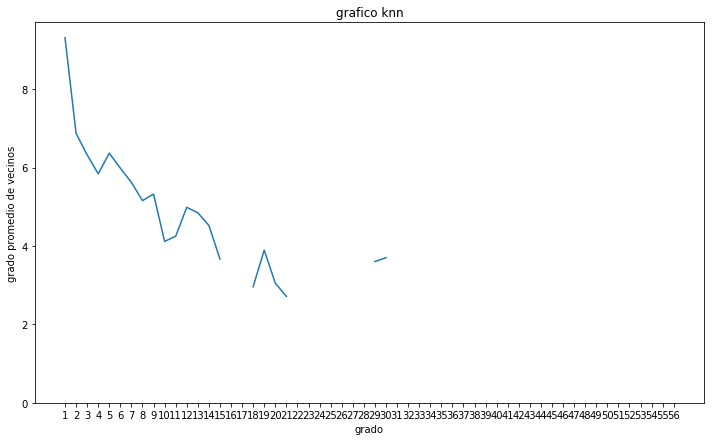

Grafo ER


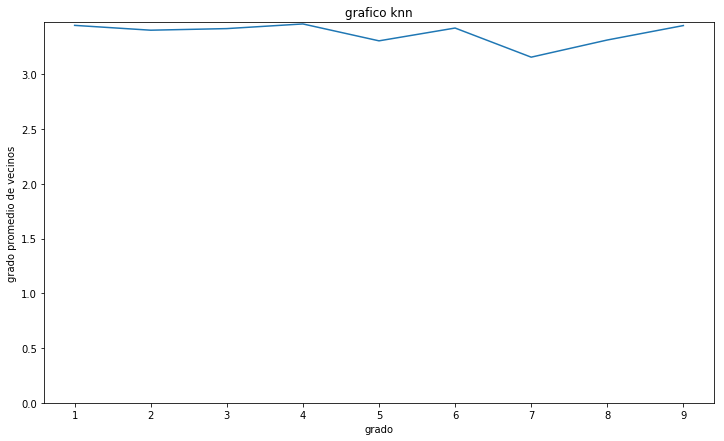

Grafo BA


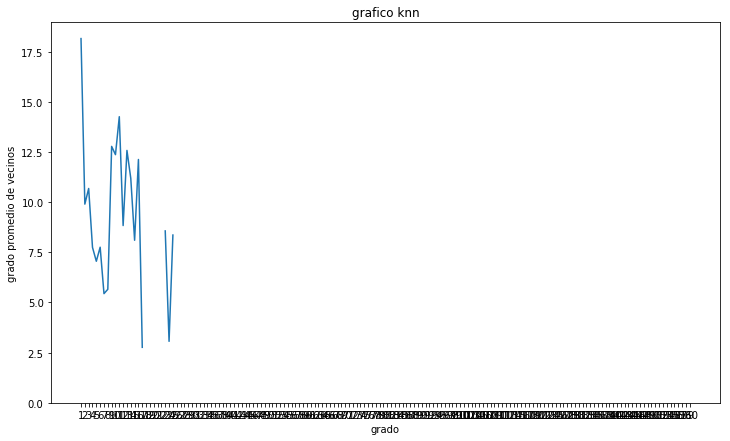

Grafo Tarea 1 Aleatorizado


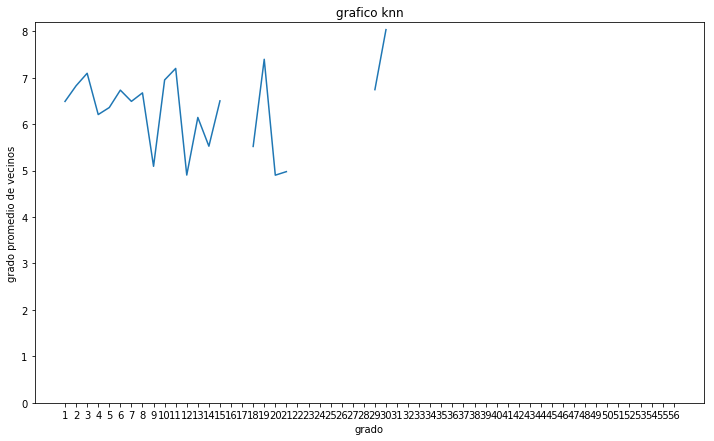

In [146]:
print ("Tarea 1")    
graficar_knn(g_t1)
print ("Grafo ER")
graficar_knn(g_ER)
print ("Grafo BA")
graficar_knn(g_BA)
print ("Grafo Tarea 1 Aleatorizado")
graficar_knn(g_t1_alea)

Finalmente, se observa efectivamente que la red original Protein (Tarea 1) es quien presenta la mayor ocurrencia de eventos en que un nodo de alto grado prefiere conexiones con nodos de bajo grado y viceversa.  
Para el caso de la red ER, no existe ninguna correlación entre los grados de los nodos conectados (se mantiene constante para todo valor).  
Para la red BA, exceptuando aquellos nodos de grado 1 y 2, nuevamente se observa que no existe correlación y que, incluso, las conexiones parecen ser arbitrarias. Algunas pocas conexiones involucran nodos de alto y bajo grado y otras involucran sólo nodos de alto grado con aquellos de iguales características.  
Por último, la red Protein Aleatorizada, indica que los nodos (independientemente de su grado) parecen preferir conexiones con aquellos de grado mayor o igual a 5. 
